# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Learn how to recognise hand-written digits using ANNs (Artificial Neural Nets)

</font>
</div>

# Problem Statement
<hr style="border:2px solid black"> </hr>

In [2]:
"""
How do can you write a program to recognise hand-written digits. Human can easily recognise the picture below
as the being the sequence of : 504192
"""

'\nHow do can you write a program to recognise hand-written digits. Human can easily recognise the picture below\nas the being the sequence of : 504192\n'

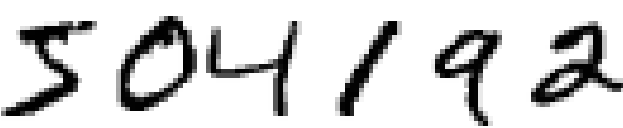

In [3]:
"""
We could come up with a lots of rule, but as you will quickly realise this has difficult to write an algorithm to 
implement them. NNs uses a slighly different approach. The main idea of NNs start by taking a large number of 
handwritten number. An example is reported below.
"""

'\nWe could come up with a lots of rule, but as you will quickly realise this has difficult to write an algorithm to \nimplement them. NNs uses a slighly different approach. The main idea of NNs start by taking a large number of \nhandwritten number. An example is reported below.\n'

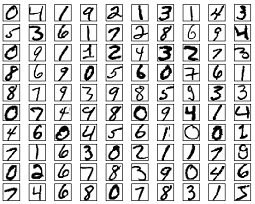

# NNs design

In [4]:
"""
We'll use 3-later NNs.

Input layer = 28x28=784 each containing the encoding of the input pixel
Hidden later = 15 as depicted below but can be more
Output layer = 10 because we have 10 digits from 0 to 10

So for instance if an image depicted 6 the output is: y(x)=(0,0,0,0,0,0,1,0,0,0)^T

Why not using 4 output? Isn't that inefficient? The ultimate justification is empirical: we can try out both 
network designs, and it turns out that, for this particular problem, the network with 10 output neurons learns
to recognize digits better than the network with 4 output neurons.
"""

"\nWe'll use 3-later NNs.\n\nInput layer = 28x28=784 each containing the encoding of the input pixel\nHidden later = 15 as depicted below but can be more\nOutput layer = 10 because we have 10 digits from 0 to 10\n\nSo for instance if an image depicted 6 the output is: y(x)=(0,0,0,0,0,0,1,0,0,0)^T\n\nWhy not using 4 output? Isn't that inefficient? The ultimate justification is empirical: we can try out both \nnetwork designs, and it turns out that, for this particular problem, the network with 10 output neurons learns\nto recognize digits better than the network with 4 output neurons.\n"

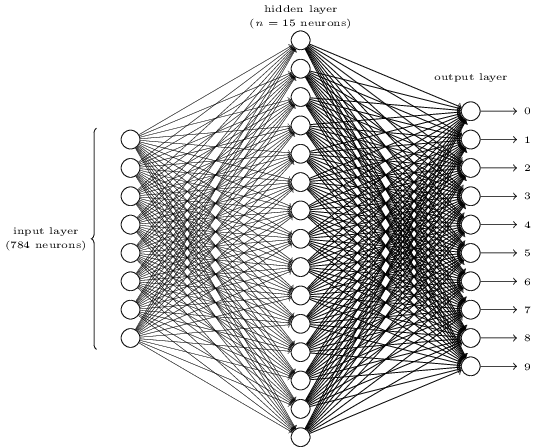

In [5]:
"""
To understand what the hidden neurons are doing. Let us assume that, simplicistly some of the 4 hidden neurons fires.
If we have to represent why they have fired we would see something like what is depicetd below. Which all together 
make up the number zero. Of course many more combination you can obtain zero, but this
should give you an idea of how the number was recongised.
"""

'\nTo understand what the hidden neurons are doing. Let us assume that, simplicistly some of the 4 hidden neurons fires.\nIf we have to represent why they have fired we would see something like what is depicetd below. Which all together \nmake up the number zero. Of course many more combination you can obtain zero, but this\nshould give you an idea of how the number was recongised.\n'

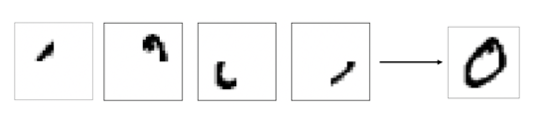

# Numerical implementation

In [6]:
"""
A module to implement the stochastic gradient descent learning algorithm for a feedforward neural network.  
Gradients are calculated using backpropagation. 
"""

'\nA module to implement the stochastic gradient descent learning algorithm for a feedforward neural network.  \nGradients are calculated using backpropagation. \n'

# Import modules

In [3]:
import _pickle as cPickle
import pickle
import gzip
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

# The dataset

In [8]:
"""
We'll use the MNIST data set, which contains tens of thousands of scanned images of handwritten digits, 
together with their correct classifications. MNIST's name comes from the fact that it is a modified subset 
of two data sets collected by NIST, the United States' National Institute of Standards and Technology. 

Each image is a these are 28 x 28 greyscale images. By convention we'll look at is as a  It'll be convenient to 
regard each training input x as a 28×28=784-dimensional vector. Each entry in the vector represents the grey value 
for a single pixel in the image.

The dataset comes in two parts:
[1] The first part contains 60,000 images to be used as training data. 
[2] The second part of the MNIST data set is 10,000 images to be used as test data.
"""

"\nWe'll use the MNIST data set, which contains tens of thousands of scanned images of handwritten digits, \ntogether with their correct classifications. MNIST's name comes from the fact that it is a modified subset \nof two data sets collected by NIST, the United States' National Institute of Standards and Technology. \n\nEach image is a these are 28 x 28 greyscale images. By convention we'll look at is as a  It'll be convenient to \nregard each training input x as a 28×28=784-dimensional vector. Each entry in the vector represents the grey value \nfor a single pixel in the image.\n\nThe dataset comes in two parts:\n[1] The first part contains 60,000 images to be used as training data. \n[2] The second part of the MNIST data set is 10,000 images to be used as test data.\n"

In [9]:
"""
mnist_loader
~~~~~~~~~~~~
A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('../DATASETS/mnist.pkl.gz', 'rb')
    #training_data, validation_data, test_data = cPickle.load(f)
    #Please see link below 
    #https://github.com/MichalDanielDobrzanski/DeepLearningPython35/issues/15
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return training_data, validation_data, test_data

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    
    tr_d, va_d, te_d = load_data()
    
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    # zip in python 3.x return an object and to have it return the raw data you need
    # to use list()
    training_data = list(zip(training_inputs, training_results))
    print("No of training data:", len(training_data))
    
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    print("No of validation data:", len(validation_data))
    
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    print("No of test data:", len(test_data))
    
    return training_data, validation_data, test_data

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

# Load the dataset and split the data

In [10]:
"""
Load the data set and give the number of element in each split.
"""

'\nLoad the data set and give the number of element in each split.\n'

In [11]:
training_data, validation_data, test_data = load_data_wrapper()

No of training data: 50000
No of validation data: 10000
No of test data: 10000


# Initialise the ANNs

In [12]:
def initialiseANNs(sizes):

    """The list ``sizes`` contains the number of neurons in the
    respective layers of the network.  For example, if the list
    was [2, 3, 1] then it would be a three-layer network, with the
    first layer containing 2 neurons, the second layer 3 neurons,
    and the third layer 1 neuron.  
    
    The biases and weights for the network are initialized randomly, using a Gaussiandistribution with mean 0, 
    and variance 1.  Note that the first layer is assumed to be an input layer, and by convention we won't set
    any biases for those neurons, since biases are onlyever used in computing the outputs from later layers.    
    """
    
    num_layers = len(sizes)
    sizes = sizes
    biases = [np.random.randn(y, 1) for y in sizes[1:]]
    weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
    
    print("Shape inputted sizes:", sizes)    
    print("No of biases vectors: ", len(biases))
    print("No of weights matrix: ", len(weights))
    
    for k in range(len(biases)):
        print("Shape bias vectors to be added at layer No.: ", k+2,  "->", biases[k].shape)
    
    for k in range(len(weights)):
        print("Shape weight matrices for layer No: ", k+1,  "->", weights[k].shape)

    
    return biases, weights, num_layers

In [13]:
NoOfNodeForEachLayer = [784, 30, 10]
biases, weights, num_layers = initialiseANNs(NoOfNodeForEachLayer)

Shape inputted sizes: [784, 30, 10]
No of biases vectors:  2
No of weights matrix:  2
Shape bias vectors to be added at layer No.:  2 -> (30, 1)
Shape bias vectors to be added at layer No.:  3 -> (10, 1)
Shape weight matrices for layer No:  1 -> (30, 784)
Shape weight matrices for layer No:  2 -> (10, 30)


# A clarification on the notation

In [14]:
"""
Often bias vectors and weight matrices are not entities related to a single layer, instead they describe a link
between layers. Let's consider an example: (w_24)^3

This denotes the weight for the connection FROM the kth neuron in the (l−1)th layer TO 
the jth neuron in the lth layer.
"""

"\nOften bias vectors and weight matrices are not entities related to a single layer, instead they describe a link\nbetween layers. Let's consider an example: (w_24)^3\n\nThis denotes the weight for the connection FROM the kth neuron in the (l−1)th layer TO \nthe jth neuron in the lth layer.\n"

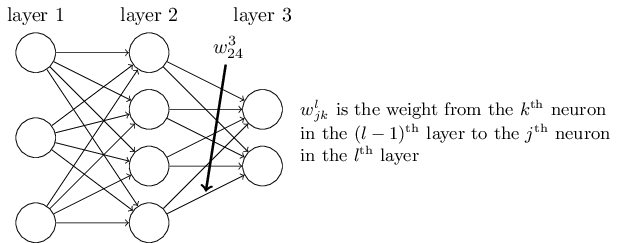

In [15]:
"""
A similar notation is used for the bias and the activation function as shown in the picture below.
"""

'\nA similar notation is used for the bias and the activation function as shown in the picture below.\n'

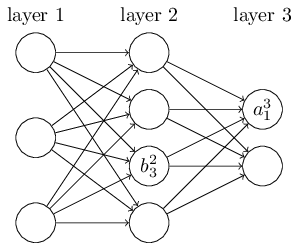

# Activation function -> Sigmoid

In [16]:
"""
Apart from the math behind the Sigmoid function, the key point is that the sigmoid function does allow
some tuning wrt to biases and weights, meaning the changes induced are predictable. If you had used a
step function the changes would have been too abrubt.
"""

'\nApart from the math behind the Sigmoid function, the key point is that the sigmoid function does allow\nsome tuning wrt to biases and weights, meaning the changes induced are predictable. If you had used a\nstep function the changes would have been too abrubt.\n'

In [17]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoidPrime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

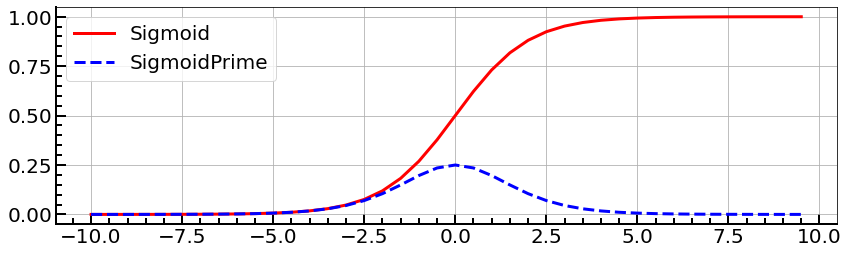

In [51]:
rcParams['figure.figsize'] = 14, 4
rcParams['font.size'] = 20
fig = plt.figure() 
ax = fig.add_subplot(111) 
plt.plot(np.arange(-10,10,0.5), sigmoid(np.arange(-10,10,0.5)), "r-", lw = 3, label = "Sigmoid")
plt.plot(np.arange(-10,10,0.5), sigmoidPrime(np.arange(-10,10,0.5)), "b--", lw = 3, label = "SigmoidPrime")

ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()
ax.minorticks_on()
ax.legend()

In [19]:
"""
So othe activation function is computed as: (where the sum is over all neurons k in the (l−1)th layer)
"""

'\nSo othe activation function is computed as: (where the sum is over all neurons k in the (l−1)th layer)\n'

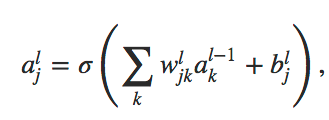

# Constracting the back-propagation algorithm

In [20]:
"""
The equations below describe 4 steps to compute the back-propagation which are all consequence of the
applcation of the chain rule.

BP1 = gives an expression for the output error in the last layer -> note L writtenin capital letter
BP2 = gives an expression fot the error at the l-th layer in terms of the next layer l+1 NOTE are going backward!
      This is the formula used in a loop, meaning we are backpropagating the error for each layer in the NN
BP3 = gives an expression the gradient of the cost wrt the baises
BP4 = gives an expression the gradient of the cost wrt the weights
"""

'\nThe equations below describe 4 steps to compute the back-propagation which are all consequence of the\napplcation of the chain rule.\n\nBP1 = gives an expression for the output error in the last layer -> note L writtenin capital letter\nBP2 = gives an expression fot the error at the l-th layer in terms of the next layer l+1 NOTE are going backward!\n      This is the formula used in a loop, meaning we are backpropagating the error for each layer in the NN\nBP3 = gives an expression the gradient of the cost wrt the baises\nBP4 = gives an expression the gradient of the cost wrt the weights\n'

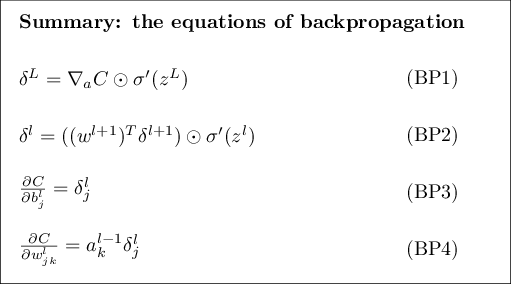

# Constracting our ANN

In [21]:
"""
A note on the scaling of the cost function is due here. We are scaling the overall cost function by a factor 1/n. 
People sometimes omit the 1/n. This is particularly useful when the total number of training examples isn't known 
in advance as in when more training data is being generated in real time. Similarly we sometimes omit the 1/m term
out the front of the sums. Conceptually this makes little difference, since it's equivalent to rescaling the learning
rate η. But when doing detailed comparisons of different work it's worth watching out for.
"""

"\nA note on the scaling of the cost function is due here. We are scaling the overall cost function by a factor 1/n. \nPeople sometimes omit the 1/n. This is particularly useful when the total number of training examples isn't known \nin advance as in when more training data is being generated in real time. Similarly we sometimes omit the 1/m term\nout the front of the sums. Conceptually this makes little difference, since it's equivalent to rescaling the learning\nrate η. But when doing detailed comparisons of different work it's worth watching out for.\n"

In [118]:
class fireANNs(): 
    
    def __init__(self, biases, weights, num_layers, NoOfNodeForEachLayer):

        self.num_layers = len(NoOfNodeForEachLayer)
        self.sizes = NoOfNodeForEachLayer
        self.biases = biases
        self.weights = weights
        self.accuracy = []
                   
        
    def feedforward(self, activationVector):
        """Return the output of the network if ``a`` is input."""
        #print(activationVector.shape)
        
        for b, w in zip(self.biases, self.weights):
            activationVector = sigmoid(np.dot(w, activationVector) + b)
        return activationVector
    

    def stochasticGradientDescent(self, training_data, epochs, mini_batch_size, eta, test_data):
        
        """Stochastic Gradient Descent
        
        Train the neural network using mini-batch stochastic
        gradient descent.
        """
                
        n_test = len(test_data)
        n = len(training_data)        
        
        
        print("|")
        print("Total No of training samples:", n)
        print("Total No of test samples:", n_test)
        print("Mini-batch size set to: ", miniBatchSize, " thus there are: ", n/miniBatchSize, "mini-batches in total")
        print("|")
        
        for j in range(epochs):
            # Reshiffling the training data
            random.shuffle(training_data)                  
            mini_batches = [ training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]                        
            for mini_batch in mini_batches:
                # Each mini_bacth has a len = miniBatchSize
                self.update_mini_batch(mini_batch, eta)
            self.accuracy.append(self.evaluate(test_data)/ n_test)            
            print("Epoch No. ", j+1, " with classification rate of: ", self.evaluate(test_data)/ n_test)
        

    def update_mini_batch(self, mini_batch, eta):
        
        """Update weights matrix and bias vecotr
        
        Update the network's weights and biases by applying gradient descent using backpropagation to a 
        single mini batch. Remember that the gradient descent rule can be expressed as:
        newValue = previousValue - learningRate * Gradient
        
        mini_batch :: list of tuples (x, y)
        eta :: is the learning rate
        """
        
        #print("Updatting miniBacth")
        #print("Each miniBatch has lenght", len(mini_batch))
        
        # Creating a new matrix initialised with zeros (list of lists)
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        #print(len(nabla_w))
        #print(len(nabla_b))
        #print(nabla_b[0].shape)
        #print(nabla_b[1].shape)
        #print(nabla_w[0].shape)
        #print(nabla_w[1].shape)
        
        
    
        """
        # An equivalent more elegant solution
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            for nb, dnb in zip(nabla_b, delta_nabla_b):
                print(nb.T)
            
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        """
        
        
        #"""
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            
            for i in range(len(nabla_b)):                                                
                nabla_b[i] = nabla_b[i] + delta_nabla_b[i]
            for i in range(len(nabla_w)):                
                nabla_w[i] = nabla_w[i] + delta_nabla_w[i]
        #"""
        
        
        # Perform the gradient descent update
        # The devision by len(mini_batch) is there because we are averaging over the elemebt
        # in the miniBatch.
        factor = eta/len(mini_batch)
        self.weights = [w - factor * nw  for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - factor * nb   for b, nb in zip(self.biases, nabla_b)]
        

    def backprop(self, x, y):
        
        """Backpropagatin implementation.
        
        Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``.        
        """
        
        # Creating & intialising the gradient vector and matrix
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        # list to store all the activations, layer by layer
        activations = [x] 
        # list to store all the z vectors, layer by layer
        zs = []
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # backward pass
        """
        Please note this is the last later identified as -1.
        Which will be proagated backword
        """
        deltaError = self.cost_derivative(activations[-1], y) * sigmoidPrime(zs[-1])
        nabla_b[-1] = deltaError
        nabla_w[-1] = np.dot(deltaError, activations[-2].transpose())
        
        """
        We now proceed to update the rest of the derivatives. The update
        means take the error in the last error and bropagate all the way up.
        Please note that deltaError value are being updated several timee in the
        loop below.
        """
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):            
            z = zs[-l]
            sp = sigmoidPrime(z)
            deltaError = np.dot(self.weights[-l+1].transpose(), deltaError) * sp
            nabla_b[-l] = deltaError
            nabla_w[-l] = np.dot(deltaError, activations[-l-1].transpose())
        
        return (nabla_b, nabla_w)

    
    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        
        return sum(int(x == y) for (x, y) in test_results)

    
    def cost_derivative(self, output_activations, y):
        """
        Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations.
        
        cost = 1/2 (output_activations -y)^2
        d_cost/d_output_activations =  1/2 * 2 (output_activations - y) *1 =(output_activations - y)
        """
        return (output_activations - y)

# Firing the ANNs

In [125]:
NoOfNodeForEachLayer = [784, 30, 15]
net = fireANNs(biases, weights, num_layers, NoOfNodeForEachLayer)
NoOfEpochs = 15
miniBatchSize = 500
learningRate = 3.0
net.stochasticGradientDescent(training_data, NoOfEpochs, miniBatchSize, learningRate, test_data)

|
Total No of training samples: 50000
Total No of test samples: 10000
Mini-batch size set to:  500  thus there are:  100.0 mini-batches in total
|
Epoch No.  1  with classification rate of:  0.449
Epoch No.  2  with classification rate of:  0.5516
Epoch No.  3  with classification rate of:  0.6141
Epoch No.  4  with classification rate of:  0.6671
Epoch No.  5  with classification rate of:  0.7051
Epoch No.  6  with classification rate of:  0.7313
Epoch No.  7  with classification rate of:  0.7476
Epoch No.  8  with classification rate of:  0.7588
Epoch No.  9  with classification rate of:  0.7678
Epoch No.  10  with classification rate of:  0.7743
Epoch No.  11  with classification rate of:  0.7794
Epoch No.  12  with classification rate of:  0.7838
Epoch No.  13  with classification rate of:  0.7888
Epoch No.  14  with classification rate of:  0.7923
Epoch No.  15  with classification rate of:  0.7954


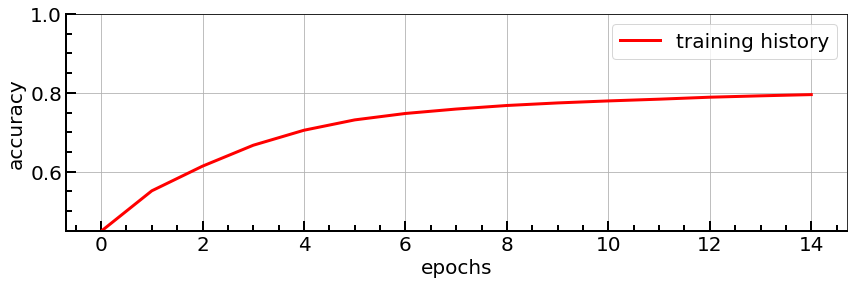

In [126]:
rcParams['figure.figsize'] = 14, 4
rcParams['font.size'] = 20
fig = plt.figure() 
ax = fig.add_subplot(111) 

plt.plot(range(NoOfEpochs), net.accuracy, "r-", lw = 3, label = "training history")

ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_ylim(min(net.accuracy), 1)
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.grid()
ax.minorticks_on()
ax.legend()

In [24]:
print(net.weights[0].shape)
print(net.weights[1].shape)

(30, 784)
(10, 30)


In [26]:
"""
A note on how to appreciate this accuracy number. The simplest baseline of all, of course, is to randomly guess 
the digit. That'll be right about ten percent of the time. You'll agree with him that ome of them are not easy
and to be honest I'd rather classify them as non-numbers!

Are there other alternatives? You can in theory use SVMs to get performance up to 98% but to go behond that we's
need an ANNs.
"""

"\nA note on how to appreciate this accuracy number. The simplest baseline of all, of course, is to randomly guess \nthe digit. That'll be right about ten percent of the time. You'll agree with him that ome of them are not easy\nand to be honest I'd rather classify them as non-numbers!\n\nAre there other alternatives? You can in theory use SVMs to get performance up to 98% but to go behond that we's\nneed an ANNs.\n"

# Example of tough to classify images

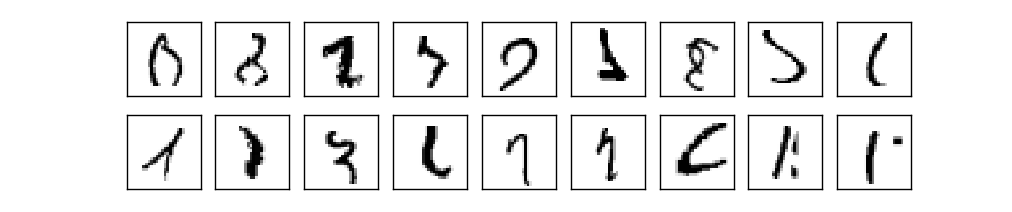

# Interpretability

In [27]:
"""
The weights and biases in the network were discovered automatically and it seems somewhat mysterious.
"""

'\nThe weights and biases in the network were discovered automatically and it seems somewhat mysterious.\n'

# Simple explanation and code to understand forward and backward pass

<div class="alert alert-info">
<font color=black>

- We can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations.

</font>
</div>

In [4]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

In [6]:
def initialiseCoeffs():
    
    """Initialise coefficients
    
    Randomly initialize weights for a third degree 
    polynomial. Initialise them to zero is always a bad 
    idea! This is much more true even for NNs
    """
    
    a = np.random.randn()
    b = np.random.randn()
    c = np.random.randn()
    d = np.random.randn()
    
    print(f'Coefficient: a={a}, b= {b}, c={c}, d={d}')
    
    return a,b,c,d


def forwardPass(a,b,c,d):

    """Compute the forward pass
    
    In this case this is nothing more than the 
    evaluation of the polynomial.    
    """
    
    # y = a + b x + c x^2 + d x^3
    y = a + b * x + c * x ** 2 + d * x ** 3
    
    return y


def computeLoss(yPred, y):

    """Compute loss.
    
    In particular we are computing the
    square error.
    """

    loss = (1/len(y)) * np.square(yPred - y).sum()
    
    return loss

def backwardPass(yPred, y):
    
    """Compute the backward pass.
    
    dLoss_dyPred = 
    dLoss_da     =
    dLoss_db     = 
    dLoss_dc     =
    dLoss_dd     =    
    """
    
    dLoss_dyPred = 2.0 * (yPred - y)
    dLoss_da = dLoss_dyPred.sum()
    dLoss_db = (dLoss_dyPred * x).sum()
    dLoss_dc = (dLoss_dyPred * x ** 2).sum()
    dLoss_dd = (dLoss_dyPred * x ** 3).sum()
    
    return dLoss_da, dLoss_db, dLoss_dc, dLoss_dd


def updateCeoffs(dLoss_da, dLoss_db, dLoss_dc, dLoss_dd, learning_rate, a,b,c,d):
    
    """Update coeffiecients
    
    The update is done via gradient descent:
    new = old - learningRate * gradient    
    """
    
    a -= learning_rate * dLoss_da
    b -= learning_rate * dLoss_db
    c -= learning_rate * dLoss_dc
    d -= learning_rate * dLoss_dd
    
    return a,b,c,d

In [7]:
lossHistory = []
learning_rate = 1e-6
epochs = 2000
a,b,c,d = initialiseCoeffs()

for t in range(epochs):
    
    # FORWARD pass: compute predicted y    
    yPred = forwardPass(a,b,c,d)
    # just to make sure it is using the initial one
    if t == 0: print(f'\nInitial coeffs: a={a}, b= {b}, c={c}, d={d}')
    
    # Compute and print loss (squared error)
    loss = computeLoss(yPred,y)
    lossHistory.append(loss)
    
    # Update the user of the learning history
    if t % 200 == 199:
        print("")
        print(f"Epoch: {t} with loss: {loss:.4f}")
        print(f'Updated coeffs: a={a:.4f}, b= {b:.4f}, c={c:.4f}, d={d:.4f}')

    # BACKWARD to compute gradients of a, b, c, d with respect to loss
    dLoss_da, dLoss_db, dLoss_dc, dLoss_dd = backwardPass(yPred,y)

    # Update weights
    a,b,c,d = updateCeoffs(dLoss_da, dLoss_db, dLoss_dc, dLoss_dd, learning_rate, a,b,c,d)

print()
print(f"Result: y = {a:.4f} + {b:.4f} x + {c:.4f} x^2 + {d:.4f} x^3")
print()

Coefficient: a=0.8583612178639501, b= -0.45700497535004436, c=-0.6137132059683529, d=-2.731346072263814

Initial coeffs: a=0.8583612178639501, b= -0.45700497535004436, c=-0.6137132059683529, d=-2.731346072263814

Epoch: 199 with loss: 0.3961
Updated coeffs: a=0.6638, b= 0.2472, c=-0.1145, d=-0.0066

Epoch: 399 with loss: 0.1881
Updated coeffs: a=0.4697, b= 0.4537, c=-0.0810, d=-0.0360

Epoch: 599 with loss: 0.0910
Updated coeffs: a=0.3324, b= 0.5902, c=-0.0573, d=-0.0554

Epoch: 799 with loss: 0.0454
Updated coeffs: a=0.2352, b= 0.6805, c=-0.0406, d=-0.0683

Epoch: 999 with loss: 0.0239
Updated coeffs: a=0.1665, b= 0.7402, c=-0.0287, d=-0.0768

Epoch: 1199 with loss: 0.0137
Updated coeffs: a=0.1178, b= 0.7797, c=-0.0203, d=-0.0824

Epoch: 1399 with loss: 0.0089
Updated coeffs: a=0.0834, b= 0.8058, c=-0.0144, d=-0.0861

Epoch: 1599 with loss: 0.0066
Updated coeffs: a=0.0590, b= 0.8230, c=-0.0102, d=-0.0885

Epoch: 1799 with loss: 0.0054
Updated coeffs: a=0.0417, b= 0.8345, c=-0.0072, d=

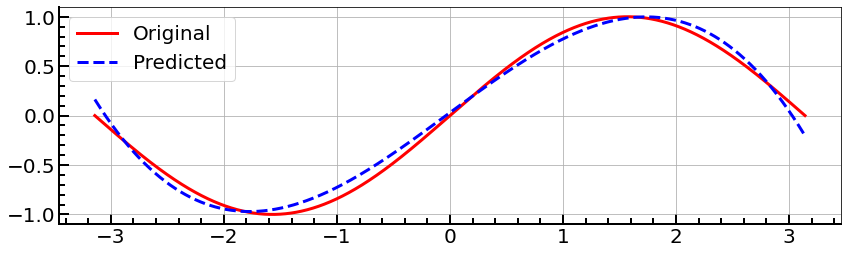

In [8]:
# a,b,c,d have the last value computed
yPred = a + b * x + c * x ** 2 + d * x ** 3

rcParams['figure.figsize'] = 14, 4
rcParams['font.size'] = 20
fig = plt.figure() 
ax = fig.add_subplot(111) 

plt.plot(x, y, "r-", lw = 3, label = "Original")
plt.plot(x, yPred, "b--", lw = 3,label = "Predicted")

ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()
ax.minorticks_on()
ax.legend()
plt.show()

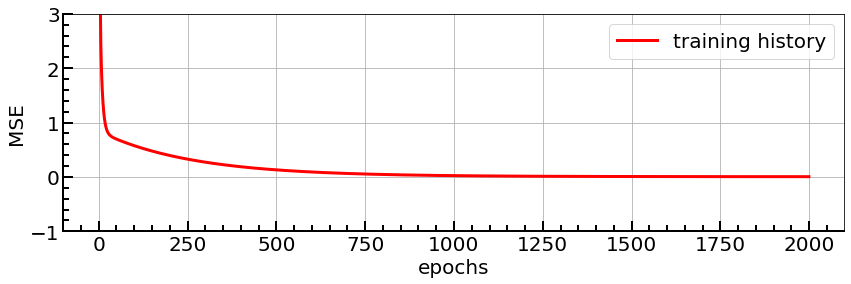

In [9]:
rcParams['figure.figsize'] = 14, 4
rcParams['font.size'] = 20
fig = plt.figure() 
ax = fig.add_subplot(111) 

plt.plot(range(epochs), lossHistory, "r-", lw = 3, label = "training history")

ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_ylim(-1, 3)
ax.set_xlabel('epochs')
ax.set_ylabel('MSE')
ax.grid()
ax.minorticks_on()
ax.legend()
plt.show()

# References

<div class="alert alert-warning">
<font color=black>

- [Reference for theory](http://neuralnetworksanddeeplearning.com/chap1.html)
- [Reference for code](https://github.com/mnielsen/neural-networks-and-deep-learning)

</font>
</div>